# Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

# Load dataset

In [3]:
data = pd.read_csv('forestfires.csv')

In [4]:
print("First 5 rows:\n", data.head())
print("\nData Info:\n")
data.info()

First 5 rows:
    X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64

In [5]:
print("\nSummary Statistics:\n", data.describe())


Summary Statistics:
                 X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653

In [6]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64


# Visualize correlations

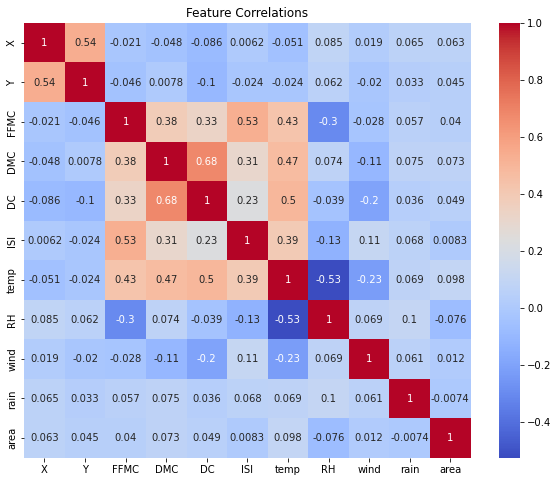

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()

# Distribution of target variable 'area'

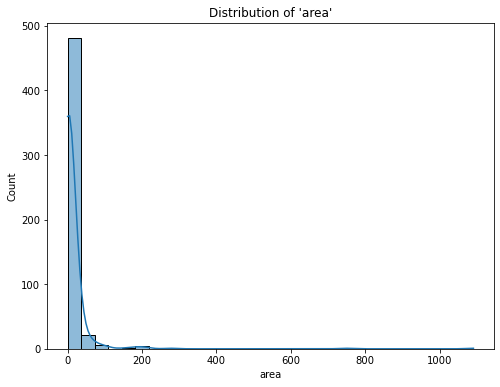

In [8]:
plt.figure(figsize=(8, 6))
sns.histplot(data['area'], bins=30, kde=True)
plt.title("Distribution of 'area'")
plt.show()

# 1. Data Preprocessing

In [9]:
data['month'] = LabelEncoder().fit_transform(data['month'])
data['day'] = LabelEncoder().fit_transform(data['day'])
data['fire_occurred'] = (data['area'] > 0).astype(int)
X = data.drop(columns=['area', 'fire_occurred'])
y_reg = data['area']         # For regression
y_class = data['fire_occurred']  # For classification

# Train-test split

In [10]:
X_train, X_test, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
_, _, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Standardize features

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression Techniques

Simple Linear Regression with 'temp' as predictor

In [12]:
simple_X_train = X_train[:, [data.columns.get_loc('temp')]]
simple_X_test = X_test[:, [data.columns.get_loc('temp')]]
simple_model = LinearRegression().fit(simple_X_train, y_train_reg)
simple_rmse = np.sqrt(mean_squared_error(y_test_reg, simple_model.predict(simple_X_test)))
print("\nSimple Linear Regression RMSE:", simple_rmse)


Simple Linear Regression RMSE: 108.46444147329089


# Multiple Linear Regression

In [13]:
multi_model = LinearRegression().fit(X_train, y_train_reg)
multi_rmse = np.sqrt(mean_squared_error(y_test_reg, multi_model.predict(X_test)))
print("\nMultiple Linear Regression RMSE:", multi_rmse)


Multiple Linear Regression RMSE: 108.39254196967966


# Polynomial Regression

degree=3 with 'temp' for illustration

In [14]:
poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(simple_X_train)
X_poly_test = poly.transform(simple_X_test)
poly_model = LinearRegression().fit(X_poly_train, y_train_reg)
poly_rmse = np.sqrt(mean_squared_error(y_test_reg, poly_model.predict(X_poly_test)))
print("\nPolynomial Regression RMSE:", poly_rmse)


Polynomial Regression RMSE: 108.28318308700922


# Lasso and Ridge Regression

In [15]:
lasso = GridSearchCV(Lasso(), {'alpha': [0.01, 0.1, 1, 10]}, cv=5)
ridge = GridSearchCV(Ridge(), {'alpha': [0.01, 0.1, 1, 10]}, cv=5)
lasso.fit(X_train, y_train_reg)
ridge.fit(X_train, y_train_reg)
print("\nLasso Best RMSE:", np.sqrt(-lasso.best_score_))
print("Ridge Best RMSE:", np.sqrt(-ridge.best_score_))


Lasso Best RMSE: 0.19012268619083605
Ridge Best RMSE: 0.397287443664085


In [21]:
# Lasso Regression Hyperparameter Tuning
lasso = GridSearchCV(Lasso(), {'alpha': [0.01, 0.1, 1, 10, 100]}, cv=5, scoring='neg_mean_squared_error')
lasso.fit(X_train, y_train_reg)
print("Best Lasso Alpha:", lasso.best_params_)
print("Best Lasso RMSE:", np.sqrt(-lasso.best_score_))

Best Lasso Alpha: {'alpha': 1}
Best Lasso RMSE: 45.599415941654215


In [22]:
# Ridge Regression Hyperparameter Tuning
ridge = GridSearchCV(Ridge(), {'alpha': [0.01, 0.1, 1, 10, 100]}, cv=5, scoring='neg_mean_squared_error')
ridge.fit(X_train, y_train_reg)
print("Best Ridge Alpha:", ridge.best_params_)
print("Best Ridge RMSE:", np.sqrt(-ridge.best_score_))

Best Ridge Alpha: {'alpha': 100}
Best Ridge RMSE: 45.58295605124594


# Support Vector Machine (SVM)

In [16]:
svm_rbf = SVC(kernel='rbf', C=1.0).fit(X_train, y_train_class)
svm_poly = SVC(kernel='poly', degree=3, C=1.0).fit(X_train, y_train_class)
print("\nRBF Kernel SVM Accuracy:", accuracy_score(y_test_class, svm_rbf.predict(X_test)))
print("Polynomial Kernel SVM Accuracy:", accuracy_score(y_test_class, svm_poly.predict(X_test)))


RBF Kernel SVM Accuracy: 0.5961538461538461
Polynomial Kernel SVM Accuracy: 0.5769230769230769


In [29]:
#SVM with RBF Kernel Hyperparameter Tuning
param_grid_svm_rbf = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1]}
svm_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid_svm_rbf, cv=5, scoring='accuracy')
svm_rbf.fit(X_train, y_train_class)
print("Best RBF SVM Params:", svm_rbf.best_params_)
print("Best RBF SVM Accuracy:", svm_rbf.best_score_)

# SVM with Polynomial Kernel Hyperparameter Tuning
param_grid_svm_poly = {'C': [0.1, 1, 10], 'degree': [2, 3, 4], 'gamma': ['scale', 'auto']}
svm_poly = GridSearchCV(SVC(kernel='poly'), param_grid_svm_poly, cv=5, scoring='accuracy')
svm_poly.fit(X_train, y_train_class)
print("Best Polynomial SVM Params:", svm_poly.best_params_)
print("Best Polynomial SVM Accuracy:", svm_poly.best_score_)

Best RBF SVM Params: {'C': 100, 'gamma': 0.1}
Best RBF SVM Accuracy: 0.5716132823978842
Best Polynomial SVM Params: {'C': 10, 'degree': 3, 'gamma': 'auto'}
Best Polynomial SVM Accuracy: 0.5593300029385836


# Decision Tree

In [24]:
# Decision Tree for Regression
tree_reg = GridSearchCV(DecisionTreeRegressor(random_state=42), {'max_depth': [None, 5, 10], 'min_samples_split': [2, 10]}, cv=5)
tree_reg.fit(X_train, y_train_reg)
print("\nDecision Tree Regressor RMSE:", np.sqrt(mean_squared_error(y_test_reg, tree_reg.predict(X_test))))

# Decision Tree for Classification
tree_class = GridSearchCV(DecisionTreeClassifier(random_state=42), {'max_depth': [None, 5, 10], 'min_samples_split': [2, 10]}, cv=5)
tree_class.fit(X_train, y_train_class)
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test_class, tree_class.predict(X_test)))


Decision Tree Regressor RMSE: 102.99845798943086
Decision Tree Classifier Accuracy: 0.49038461538461536


In [25]:
# Decision Tree Regressor Hyperparameter Tuning
param_grid_tree_reg = {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 10, 20]}
tree_reg = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_tree_reg, cv=5, scoring='neg_mean_squared_error')
tree_reg.fit(X_train, y_train_reg)
print("Best Decision Tree Regressor Params:", tree_reg.best_params_)
print("Best Decision Tree Regressor RMSE:", np.sqrt(-tree_reg.best_score_))

# Decision Tree Classifier Hyperparameter Tuning
param_grid_tree_class = {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 10, 20]}
tree_class = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree_class, cv=5, scoring='accuracy')
tree_class.fit(X_train, y_train_class)
print("Best Decision Tree Classifier Params:", tree_class.best_params_)
print("Best Decision Tree Classifier Accuracy:", tree_class.best_score_)

Best Decision Tree Regressor Params: {'max_depth': None, 'min_samples_split': 20}
Best Decision Tree Regressor RMSE: 63.54788522832307
Best Decision Tree Classifier Params: {'max_depth': 5, 'min_samples_split': 10}
Best Decision Tree Classifier Accuracy: 0.5106376726417866


# Random Forest

In [26]:
# Random Forest for Regression
rf_reg = GridSearchCV(RandomForestRegressor(n_estimators=100, random_state=42), {'max_depth': [None, 5, 10], 'min_samples_split': [2, 10]}, cv=5)
rf_reg.fit(X_train, y_train_reg)
print("\nRandom Forest Regressor RMSE:", np.sqrt(mean_squared_error(y_test_reg, rf_reg.predict(X_test))))

# Random Forest for Classification
rf_class = GridSearchCV(RandomForestClassifier(n_estimators=100, random_state=42), {'max_depth': [None, 5, 10], 'min_samples_split': [2, 10]}, cv=5)
rf_class.fit(X_train, y_train_class)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test_class, rf_class.predict(X_test)))


Random Forest Regressor RMSE: 107.8800878017918
Random Forest Classifier Accuracy: 0.5673076923076923


In [27]:
# Random Forest Regressor Hyperparameter Tuning
param_grid_rf_reg = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 10]}
rf_reg = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf_reg, cv=5, scoring='neg_mean_squared_error')
rf_reg.fit(X_train, y_train_reg)
print("Best Random Forest Regressor Params:", rf_reg.best_params_)
print("Best Random Forest Regressor RMSE:", np.sqrt(-rf_reg.best_score_))

# Random Forest Classifier Hyperparameter Tuning
param_grid_rf_class = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 10]}
rf_class = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf_class, cv=5, scoring='accuracy')
rf_class.fit(X_train, y_train_class)
print("Best Random Forest Classifier Params:", rf_class.best_params_)
print("Best Random Forest Classifier Accuracy:", rf_class.best_score_)

Best Random Forest Regressor Params: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Best Random Forest Regressor RMSE: 51.209159675829596
Best Random Forest Classifier Params: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}
Best Random Forest Classifier Accuracy: 0.576432559506318
